## Document Classification
### Business objective:
* **The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention**

## 1. Import Library

In [1]:
### Basic Libraries
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

### Text Processing Libraries
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## 2. About Dataset

In [2]:
file_path   = 'datasets/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [3]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [4]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


### 2.1 Type of File Format

In [5]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

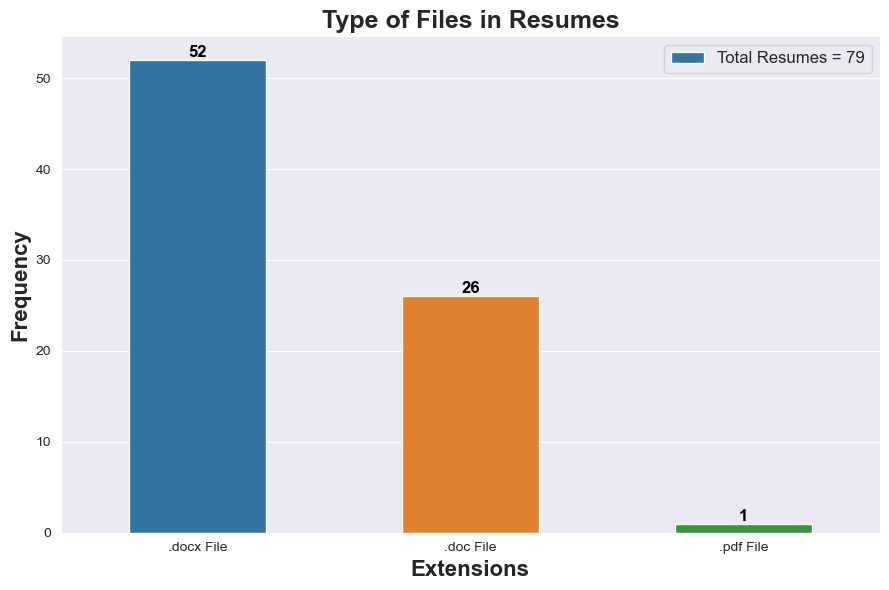

In [6]:
# Create a figure and axis
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
# Create a bar plot
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

# Set labels and title
axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
# Apply custom rcParams
pylab.rcParams.update(rcParams)
# Adjust layout and show the plot
fig.tight_layout()
plt.show()
# Save the figure
fig.savefig('Output Images\File_Type_Bar', dpi = 500)

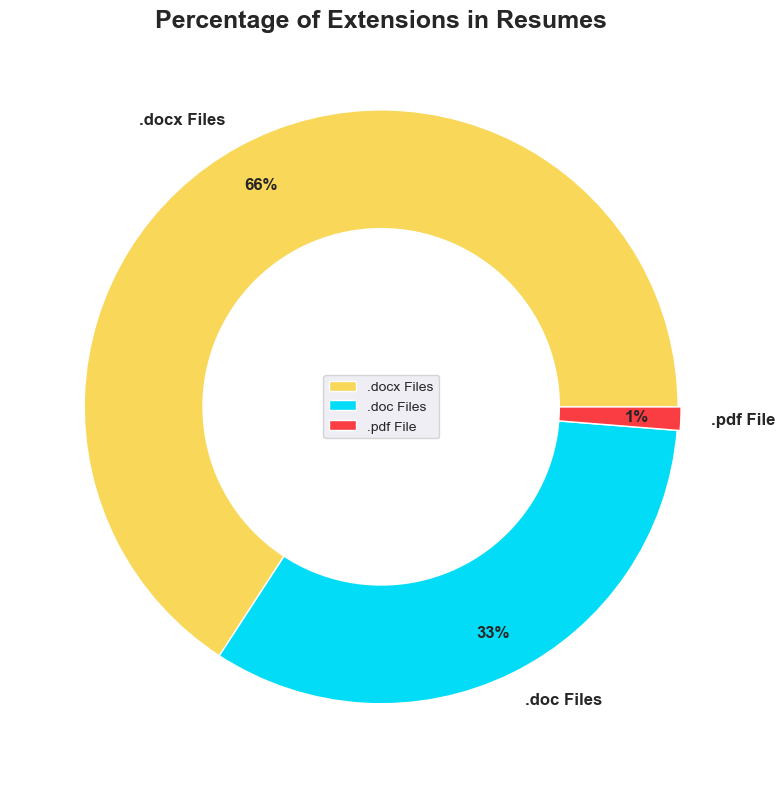

In [7]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")


pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('Output Images\Per_File_Pai', dpi = 500)

## 3. Extract Resumes by Profile Category

In [8]:
file_path = r'datasets/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [9]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft,Peoplesoft Admin_Gangareddy.doc
3,Peoplesoft,Peoplesoft Admin_Murali.docx
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
74,workday resumes,Sri Krishna S_Hexaware.doc
75,workday resumes,Srikanth-Hexaware.docx
76,workday resumes,SSKumar_Hexaware.docx
77,workday resumes,Venkateswarlu B_Hexaware.doc


In [10]:
resume_data.Profile.value_counts().index

Index(['React JS Developer', 'workday resumes', 'Peoplesoft', 'SQL Developer'], dtype='object')

In [11]:
resume_data.Profile.value_counts()

React JS Developer    24
workday resumes       21
Peoplesoft            20
SQL Developer         14
Name: Profile, dtype: int64

### 3.1 Number of Total Resumes

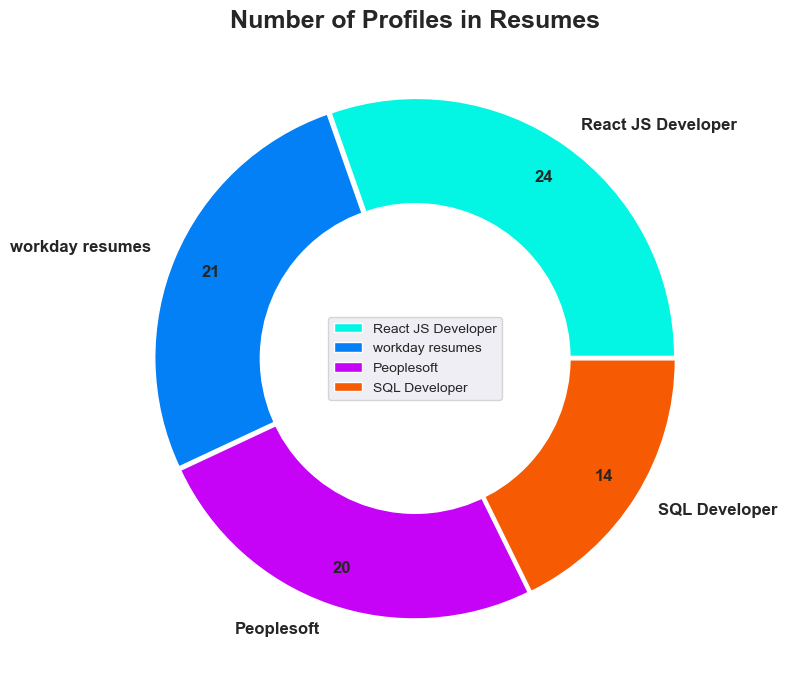

In [12]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = tuple(0.01 for _ in range(len(sizes)))

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('Output Images/No_Resume_Pai', dpi = 500)

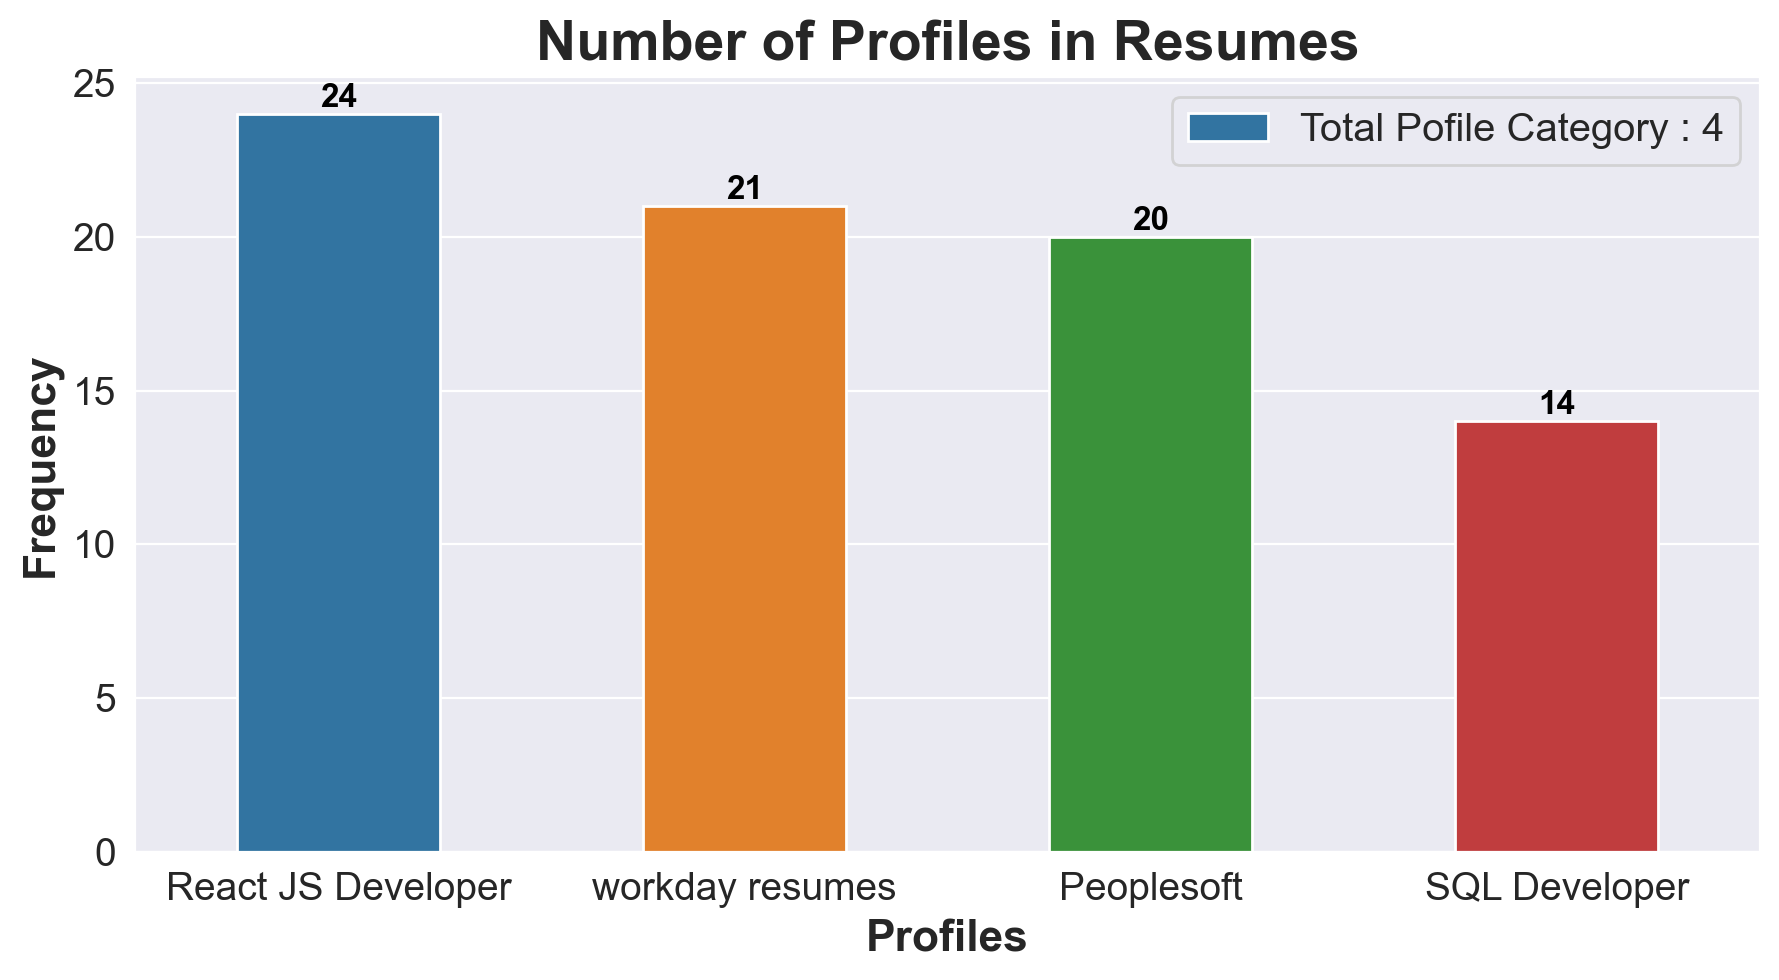

In [13]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), width=0.5,
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('Output Images/No_Resume_Bar', dpi = 500)

### Percentage of Profiles Category

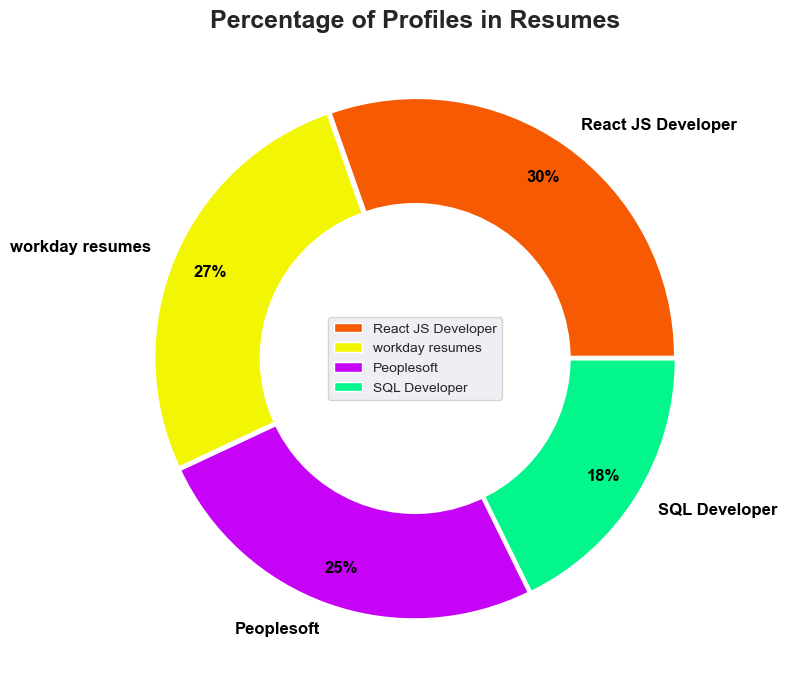

In [14]:
fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = tuple(0.01 for _ in range(len(sizes)))


plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('Output Images/Per_Cat_Pai', dpi = 500)

## 4. Reading a Resume File

In [15]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx('datasets\React JS Developer\React Developer_Haripriya.docx'))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

In [16]:
print(extract_text_from_docx('datasets\React JS Developer\Reactjs Developer_M Lokesh.docx'))

MAREEDU LOKESH BABU



PROFESSIONAL OVERVIEW

    Around 2  years of experience in software design, development, implementation and maintenance of applications using, HTML, CSS, JavaScript, JQuery, PHP, MySQL, React js , Node Js.

Knowledge in Object Oriented PHP Programming.

Knowledge in versioning control like GIT.

Involved in Responsive web development using Bootstrap.

Strong Analytical, Problem solving skills, Presentation skills and  good team player.

I can work with independently.





SCHOLASTICS

                B.Tech (Computer Science Engineering.) from VKR ,VNB & AGK  College of Engineering and Technology,  Gudiwada, affiliated to JNTUK with 76.4% in 2019.

TECHNICAL SKILLS

Web Technologies                 : HTML, CSS, BOOTSTAP,JAVASCRIPT, JQUERY, 

                                                                             PHP, React js , Node js.                                                                              

Database                                : M

## 5. Data Exploration

In [17]:
resume_data = pd.read_csv('csv files\Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,hari narayana professional summary years exper...
6,PeopleSoft,murali professional summary years experience p...
7,PeopleSoft,priyabrata hota career objective pursuing peop...
8,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,address manyata tech park nagavara bangalore l...


### 5.1 N-grams
* **N-grams analyses are often used to see which words often show up together.**

In [18]:
# TextBlob library to extract unigrams (single words) from the 'Resume_Details' column of the DataFrame
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['classification']),
 WordList(['internal']),
 WordList(['classification']),
 WordList(['internal']),
 WordList(['murali']),
 WordList(['experience']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['working']),
 WordList(['peoplesoft']),
 WordList(['administration']),
 WordList(['performing']),
 WordList(['various']),
 WordList(['infrastructure']),
 WordList(['related']),
 WordList(['activities']),
 WordList(['peoplesoft']),
 WordList(['environments']),
 WordList(['installed'])]

In [19]:
# TextBlob library to extract bigrams (pairs of consecutive words) from the 'Resume_Details' column of the DataFrame
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['classification', 'internal']),
 WordList(['internal', 'classification']),
 WordList(['classification', 'internal']),
 WordList(['internal', 'murali']),
 WordList(['murali', 'experience']),
 WordList(['experience', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'working']),
 WordList(['working', 'peoplesoft']),
 WordList(['peoplesoft', 'administration']),
 WordList(['administration', 'performing']),
 WordList(['performing', 'various']),
 WordList(['various', 'infrastructure']),
 WordList(['infrastructure', 'related']),
 WordList(['related', 'activities']),
 WordList(['activities', 'peoplesoft']),
 WordList(['peoplesoft', 'environments']),
 WordList(['environments', 'installed']),
 WordList(['installed', 'configured'])]

In [20]:
# TextBlob library to extract trigrams (triplets of consecutive words) from the 'Resume_Details' column of the DataFrame 
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['classification', 'internal', 'classification']),
 WordList(['internal', 'classification', 'internal']),
 WordList(['classification', 'internal', 'murali']),
 WordList(['internal', 'murali', 'experience']),
 WordList(['murali', 'experience', 'summary']),
 WordList(['experience', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'working']),
 WordList(['experience', 'working', 'peoplesoft']),
 WordList(['working', 'peoplesoft', 'administration']),
 WordList(['peoplesoft', 'administration', 'performing']),
 WordList(['administration', 'performing', 'various']),
 WordList(['performing', 'various', 'infrastructure']),
 WordList(['various', 'infrastructure', 'related']),
 WordList(['infrastructure', 'related', 'activities']),
 WordList(['related', 'activities', 'peoplesoft']),
 WordList(['activities', 'peoplesoft', 'environments']),
 WordList(['peoplesoft', 'environments', 'installed']),
 WordList(['environments', 'installed', 

In [21]:
resume_data['Resume_Details']

0     anubhav kumar singh core competencies scriptin...
1     classification internal classification interna...
2     sirazuddin bangalore india sirazuddin bangalor...
3     peoplesoft admin varkala vikas career objectiv...
4     peoplesoft administration vivekanand sayana ca...
5     hari narayana professional summary years exper...
6     murali professional summary years experience p...
7     priyabrata hota career objective pursuing peop...
8     tanna sujatha objective seeking challenging ro...
9     address manyata tech park nagavara bangalore l...
10    name ravali curriculum vitae specialization co...
11    susovan bag seeking challenging position field...
12    kanumuru deepak reddy career objective secure ...
13    haripriya battina experience developer reactjs...
14    kamalakar reddy linked professional summary ye...
15    naveen sadhu title software developer location...
16    pragnya pattnaik expertise around years experi...
17    sarala madasu sarala madasu sri geethika p

### 5.2 Top 20 most used words in Resumes
* **Using CountVectorizer**

In [22]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [23]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,330,experience
1,253,using
2,232,workday
3,213,sql
4,208,application
5,188,server
6,183,project
7,180,data
8,170,reports
9,169,peoplesoft


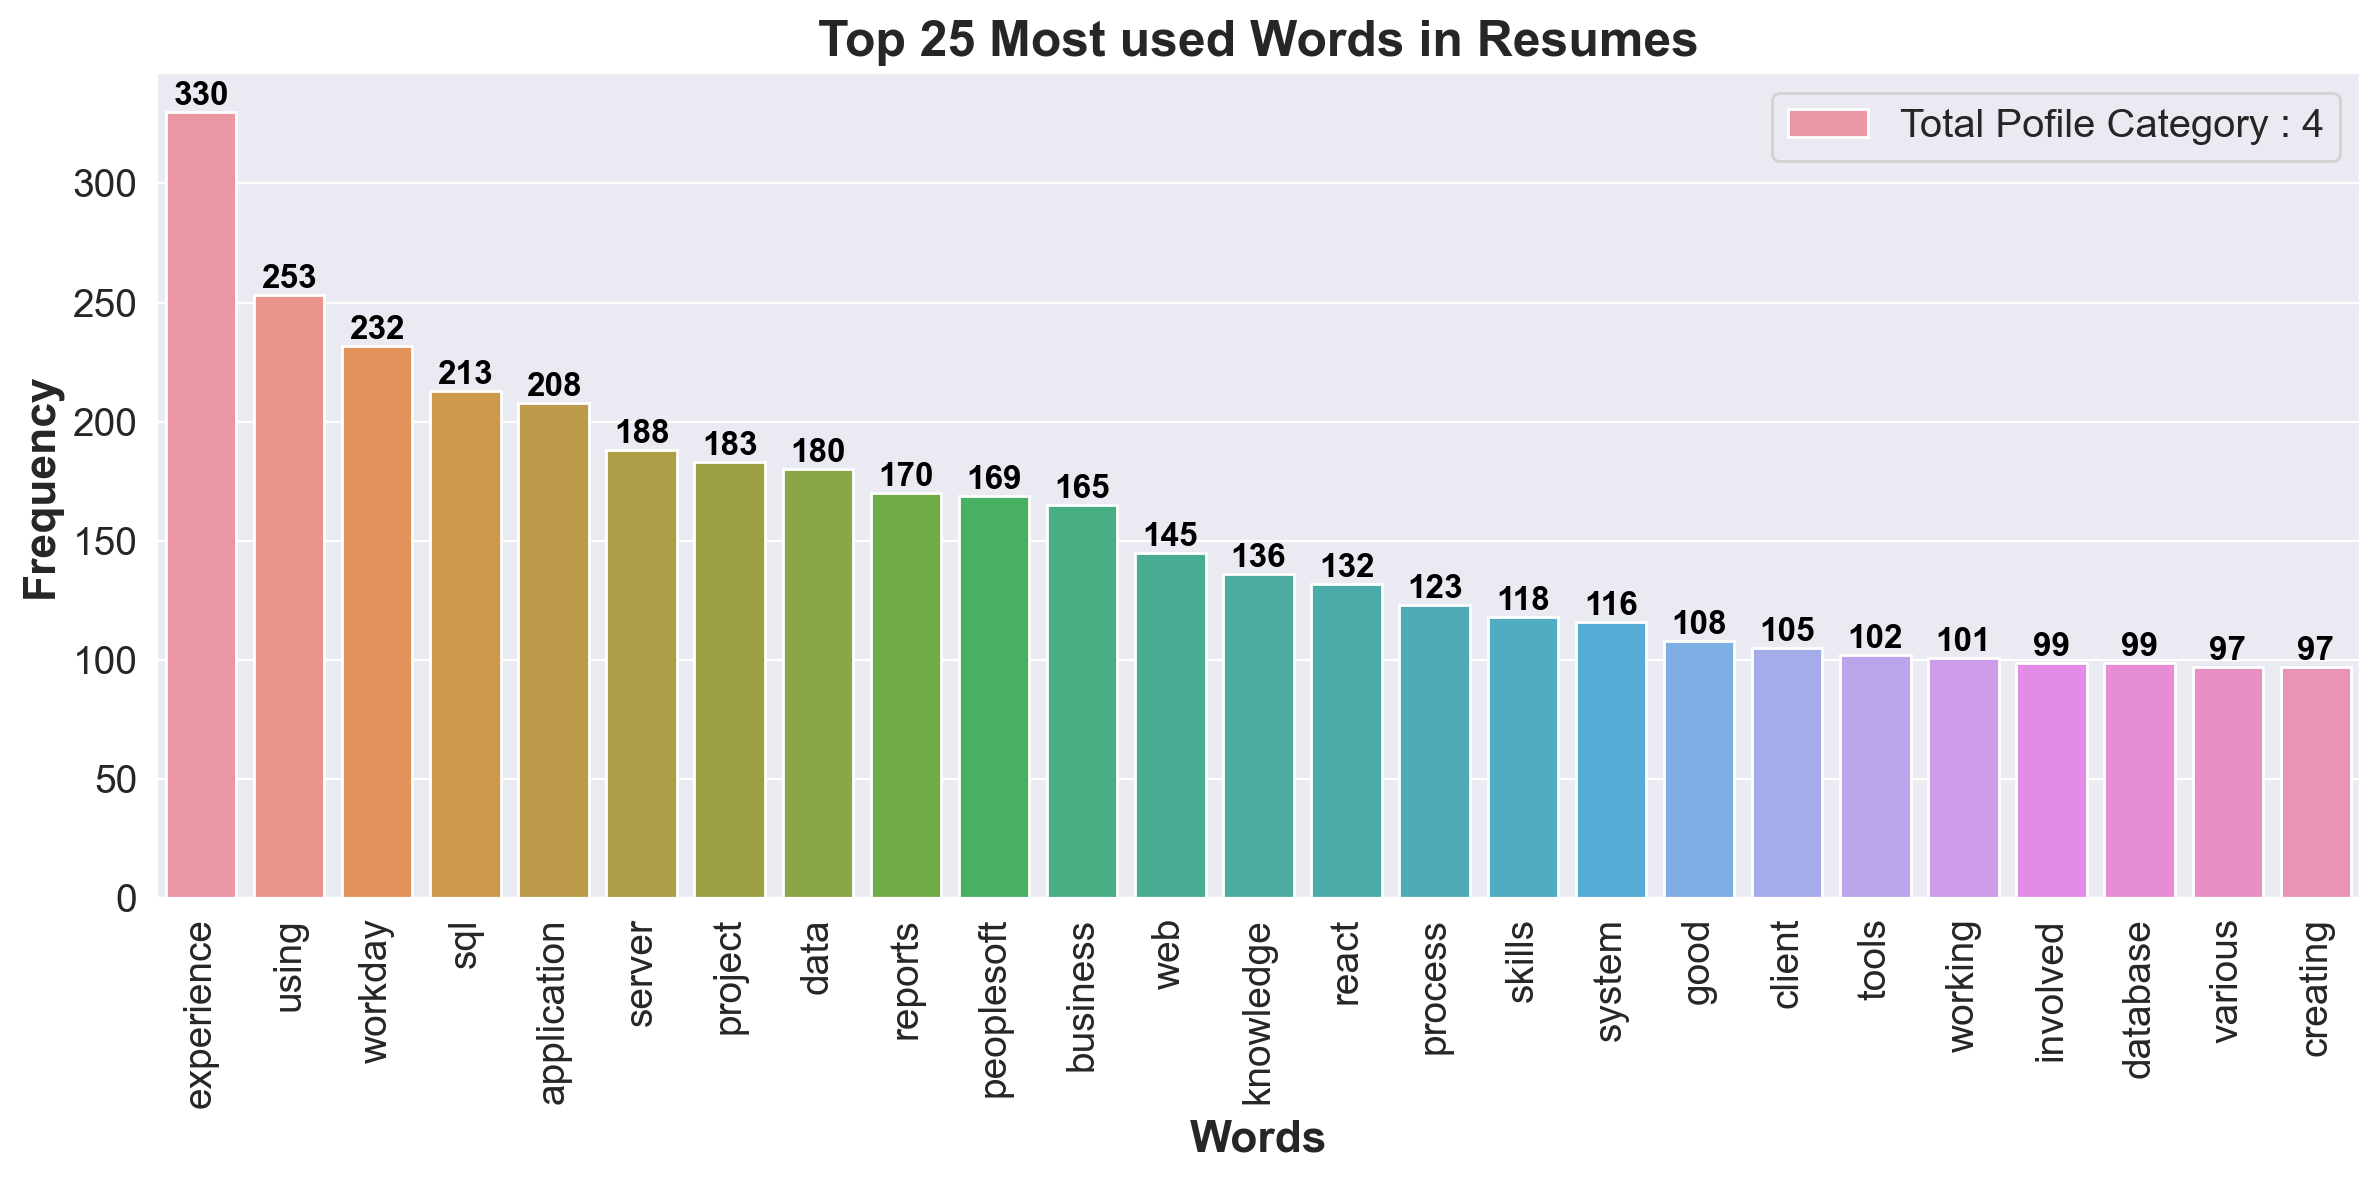

In [24]:
# Create a bar plot for the top 25 most used words in resumes
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))
# Set labels and title for the plot
axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
# Apply custom rcParams
pylab.rcParams.update(rcParams)
# Adjust layout and show the plot
fig.tight_layout()
plt.show()
# Save the figure
fig.savefig('Output Images/Top_Words_Bar', dpi = 500)

### 5.4 Using the Word Clowds

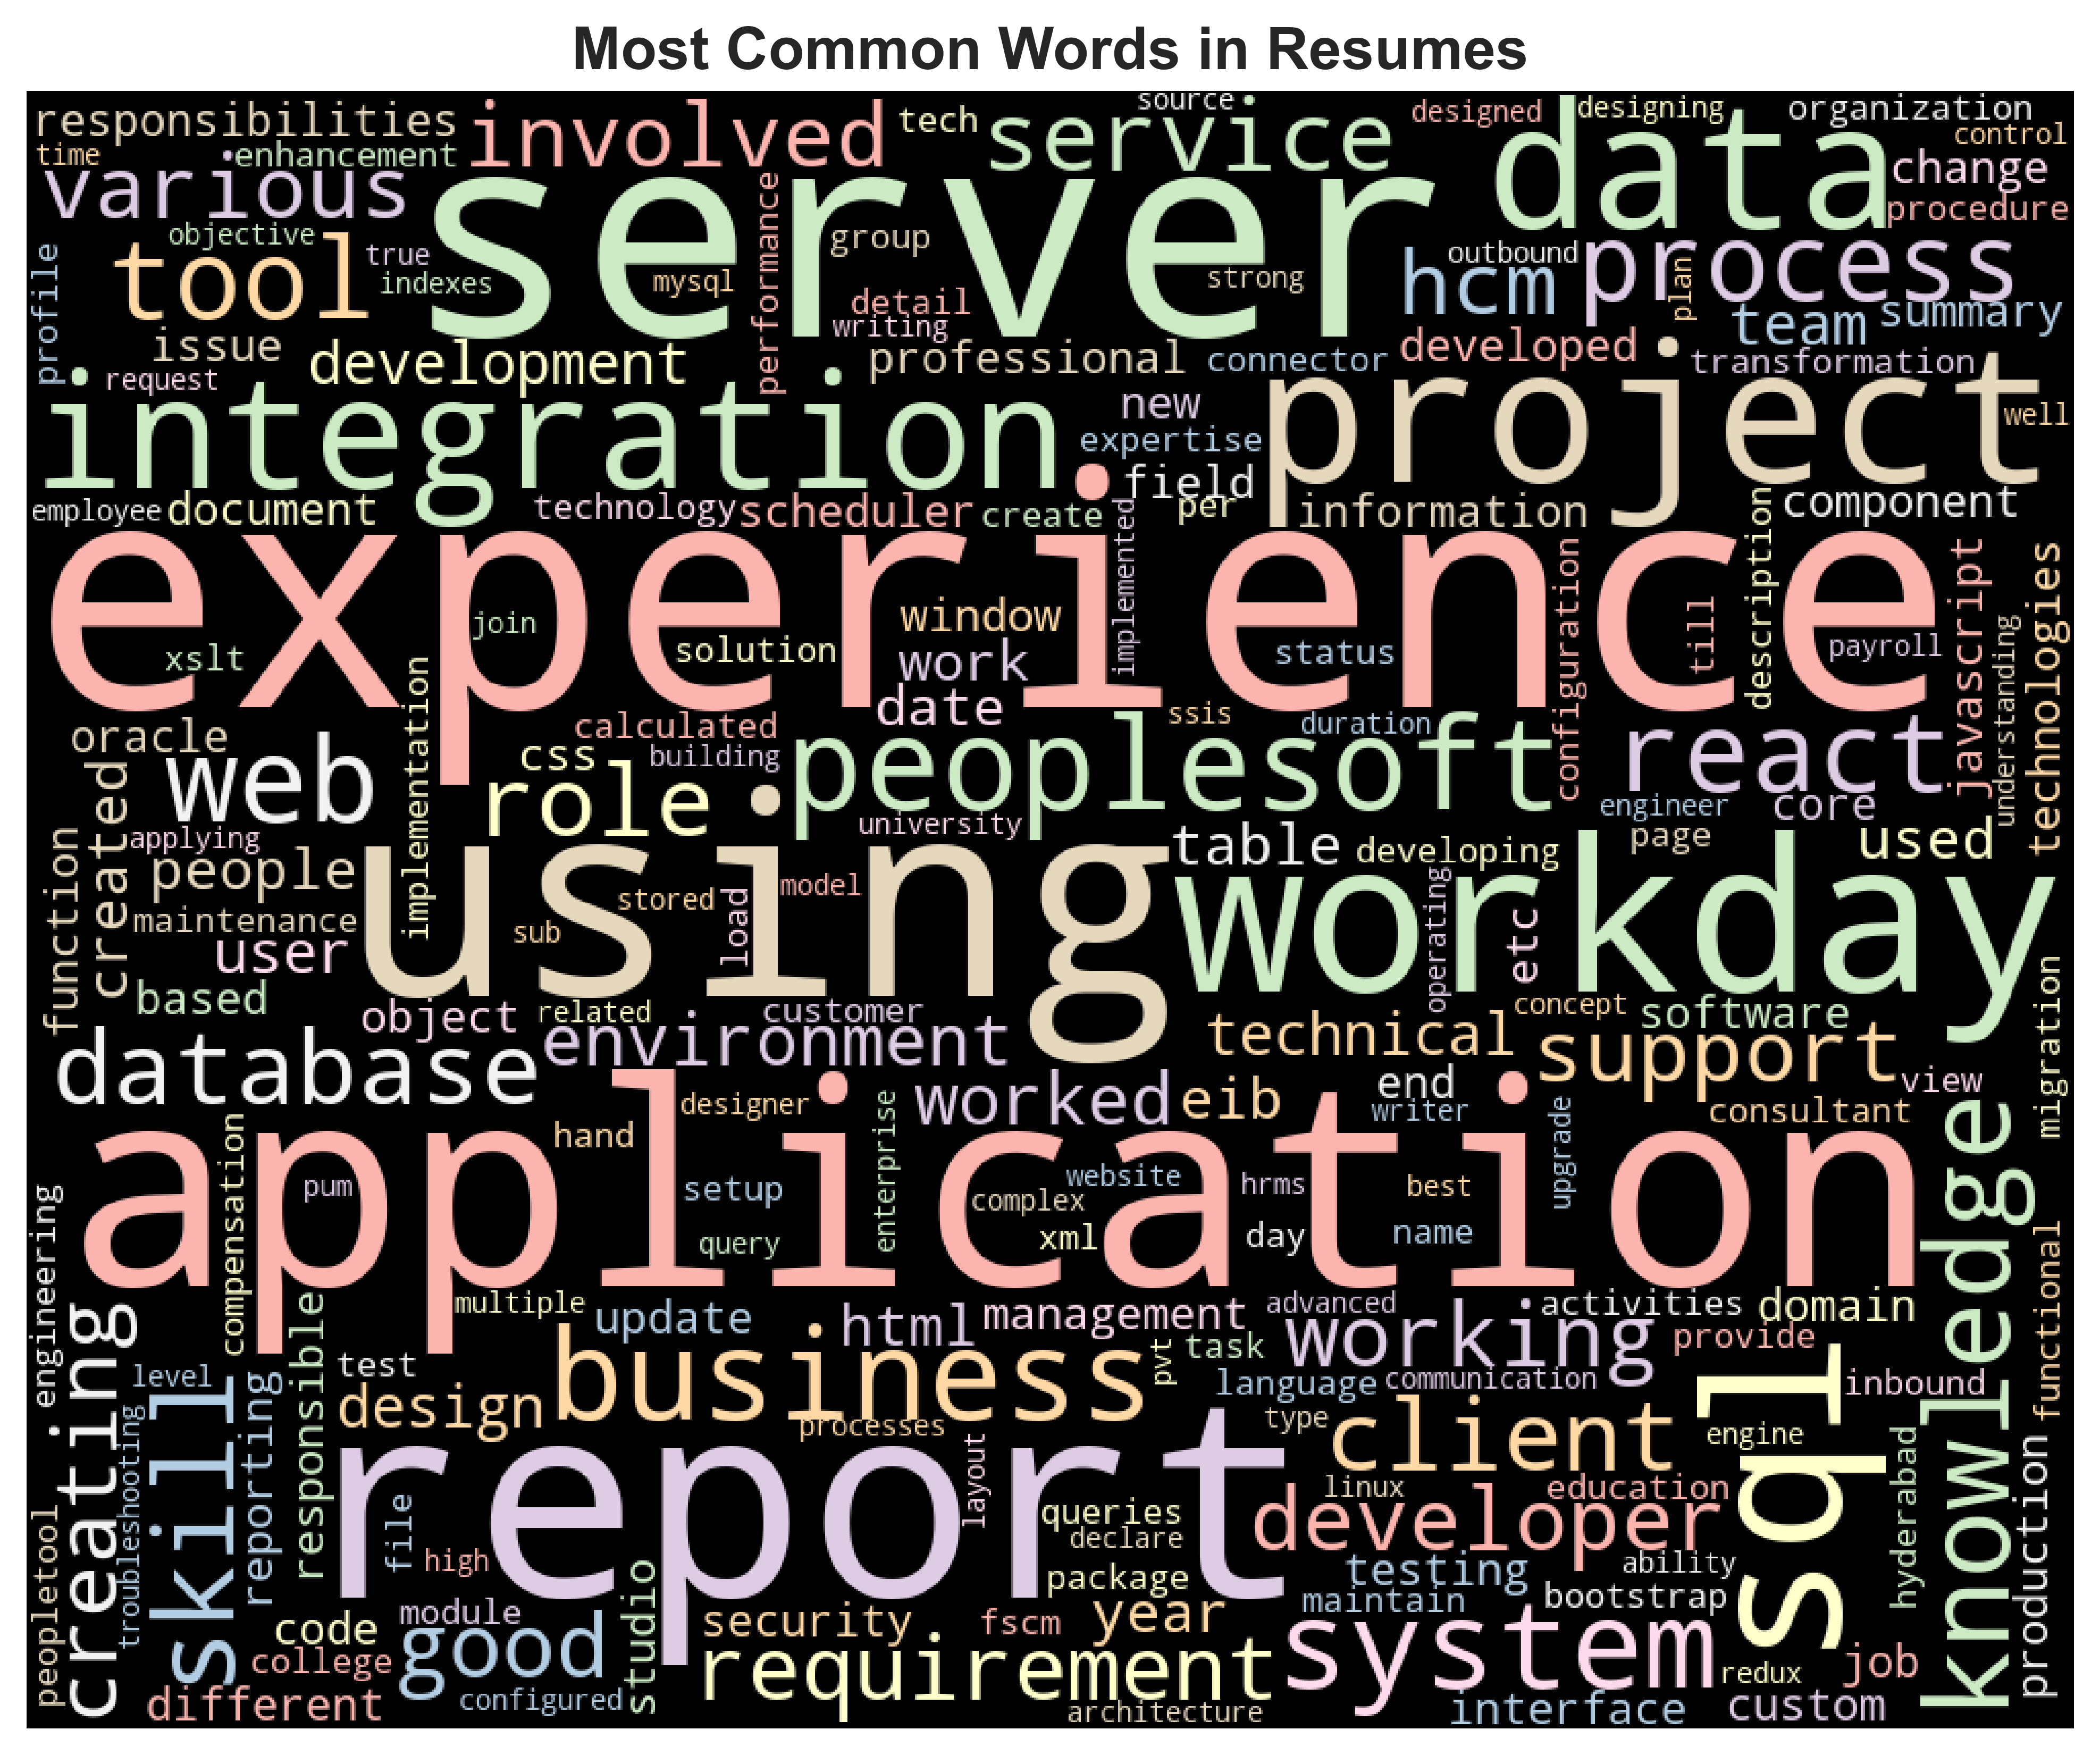

In [25]:
# Concatenate all resume details into a single text variable
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

# Generate a WordCloud object with specified parameters
word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)
# Create a matplotlib figure for displaying the Word Cloud
plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
# Display the Word Cloud using imshow
plt.imshow(word_cloud)
# Remove axis ticks for better visualization
plt.axis("off")

word_cloud.to_file('Output Images/Word_Clowds.png')
plt.show()

# THE END !!